# Regresión logística

In [42]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [43]:
df = pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [44]:
df.shape

(850, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [46]:
# Extraer las columnas que usaremos para x,y
x = df.iloc[:700,:8].values
y = df.iloc[:700,8].values

In [47]:
# Dividir los datos en datasets de prueba y entrenamiento

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (x, y, test_size=0.3, random_state=0)

In [48]:
# Ajustar (entrenar) el clasificador de regresión logística
lgm = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
hw_model = lgm.fit(X_train, Y_train)

In [49]:
Y_train_pred = hw_model.predict(X_train)
Y_test_pred = hw_model.predict(X_test)
x_prediction =df.iloc[700:,:8].values
y_prediccion_pred = hw_model.predict(x_prediction)

In [50]:
# Predicción
for i in range(150):
  if y_prediccion_pred[i]==0:
    result = "No Default"
  else:
    result = "Default"
  # Predicción
  print("Cliente ", i+1,":",result)


Cliente  1 : No Default
Cliente  2 : No Default
Cliente  3 : Default
Cliente  4 : No Default
Cliente  5 : No Default
Cliente  6 : No Default
Cliente  7 : No Default
Cliente  8 : Default
Cliente  9 : No Default
Cliente  10 : No Default
Cliente  11 : No Default
Cliente  12 : No Default
Cliente  13 : No Default
Cliente  14 : No Default
Cliente  15 : No Default
Cliente  16 : No Default
Cliente  17 : Default
Cliente  18 : No Default
Cliente  19 : No Default
Cliente  20 : No Default
Cliente  21 : No Default
Cliente  22 : No Default
Cliente  23 : No Default
Cliente  24 : No Default
Cliente  25 : No Default
Cliente  26 : No Default
Cliente  27 : No Default
Cliente  28 : No Default
Cliente  29 : No Default
Cliente  30 : No Default
Cliente  31 : No Default
Cliente  32 : No Default
Cliente  33 : Default
Cliente  34 : No Default
Cliente  35 : No Default
Cliente  36 : No Default
Cliente  37 : No Default
Cliente  38 : No Default
Cliente  39 : No Default
Cliente  40 : No Default
Cliente  41 : Default

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
k = 5 # Este es un ejemplo, puedes ajustar el valor de K
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(f'Reporte de clasificación:\n{report}')

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       161
         1.0       0.15      0.10      0.12        49

    accuracy                           0.65       210
   macro avg       0.45      0.46      0.45       210
weighted avg       0.61      0.65      0.63       210



# Arbol de decision

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy on the test set: 0.7761904761904762


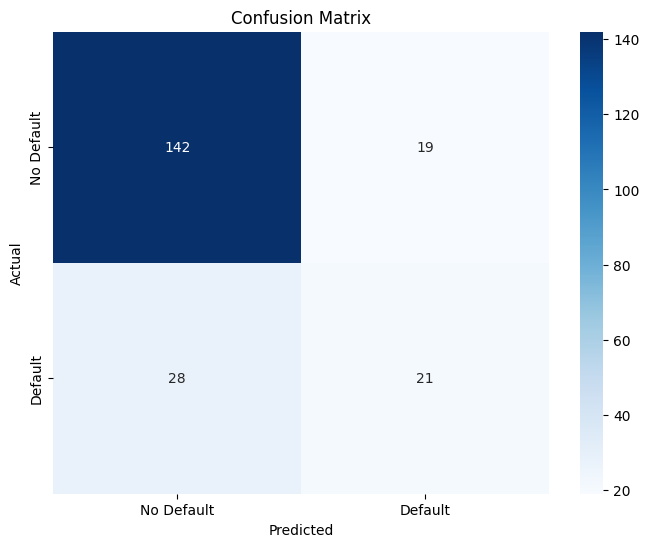

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Define the classifier (Decision Tree)
classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameter values
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

DecisionTrees's Accuracy:  0.7761904761904762


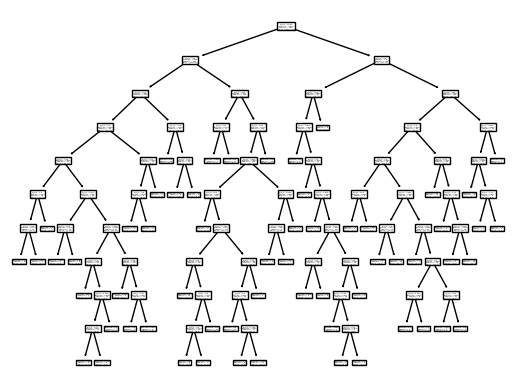

In [53]:
bankTree = DecisionTreeClassifier(criterion="entropy", max_depth = 10,min_samples_leaf=4,min_samples_split=5)
bankTree # it shows the default parameters
bankTree.fit(X_train,y_train)
predTree = bankTree.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
tree.plot_tree(bankTree)
plt.show()

### Mostrar los valores de los parámetros
![alt text](https://miro.medium.com/max/2220/1*siWAvCzFy2zp81pDNoa4UA.png)

In [54]:
# Se tienen 3 valores de theta

# para theta_0
print (hw_model.intercept_)
print(hw_model.coef_)

[-0.89488919]
[[ 0.00843077  0.12011979 -0.25303381 -0.09506417 -0.00470533  0.04583699
   0.64086561  0.10047013]]


## Modelos de clasificación y métricas

In [55]:
# Importar modelos y clases de evaluación de rendimiento desde sklearn

from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [56]:
print(" Exactitud (Accuracy) {0:.2f}%\n".format(100*
                        accuracy_score(Y_test, Y_test_pred)))

# Muestra la matriz de confusión
print('Matriz de confusión\n')
print(confusion_matrix(Y_test, Y_test_pred))

# tn, fp, fn, tp = confusion_matrix(logreg_prediction, Y_test).ravel()
tn, fp, fn, tp = confusion_matrix(Y_test,Y_test_pred).ravel()
print ("\nVerdaderos negativos: ", tn)
print ("\nFalsos positivos: ",fp)
print ("\nFalsos negativos: ",fn)
print ("\nVerdaderos positivos: ",tp)

 Exactitud (Accuracy) 80.48%

Matriz de confusión

[[147   8]
 [ 33  22]]

Verdaderos negativos:  147

Falsos positivos:  8

Falsos negativos:  33

Verdaderos positivos:  22


In [57]:
# Reporte de clasificación
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       155
         1.0       0.73      0.40      0.52        55

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.70       210
weighted avg       0.79      0.80      0.78       210



In [58]:
# Obtener el puntaje ROC-AUC
print("Puntaje ROC-AUC Regresión Logística {0:.2f}".
         format(roc_auc_score(Y_test, Y_test_pred)))

Puntaje ROC-AUC Regresión Logística 0.67
